# Uplift моделирование

Разбор подходов к выбору целевых пользователей, для которых необходимо провести целевое воздействие

In [2]:
import pandas as pd
import seaborn as sns

# Import data

In [3]:
df_raw = pd.read_csv("./data/criteo-uplift-v2.1.csv")

In [4]:
df_raw.shape

(13979592, 16)

In [6]:
df = df_raw.sample(n=1000000)

In [7]:
del df_raw

In [8]:
df.dtypes

f0            float64
f1            float64
f2            float64
f3            float64
f4            float64
f5            float64
f6            float64
f7            float64
f8            float64
f9            float64
f10           float64
f11           float64
treatment       int64
conversion      int64
visit           int64
exposure        int64
dtype: object

In [9]:
df.head()

,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,treatment,conversion,visit,exposure
360096,22.662852,10.059654,8.214383,4.679882,10.280525,4.115453,-6.699321,4.833815,3.971858,13.190056,5.300375,-0.168679,1,0,0,0
8984275,12.660561,10.059654,8.481592,-2.118394,10.280525,4.115453,-13.638493,4.833815,3.755742,35.986429,5.300375,-0.168679,1,0,1,0
903162,22.327732,10.059654,8.214383,4.679882,10.280525,4.115453,-1.288207,4.833815,3.971858,13.190056,5.300375,-0.168679,1,0,0,0
4285104,24.371796,10.059654,8.296296,4.679882,10.280525,4.115453,-13.412152,4.833815,3.821584,27.760385,5.300375,-0.168679,1,0,1,0
10771332,15.030845,10.059654,8.337377,1.114982,10.280525,4.115453,-7.011752,4.833815,3.733448,57.137402,5.300375,-0.168679,1,0,1,0


# EDA

## Features

In [10]:
feat_cols = ["f{:d}".format(el) for el in range(11)]

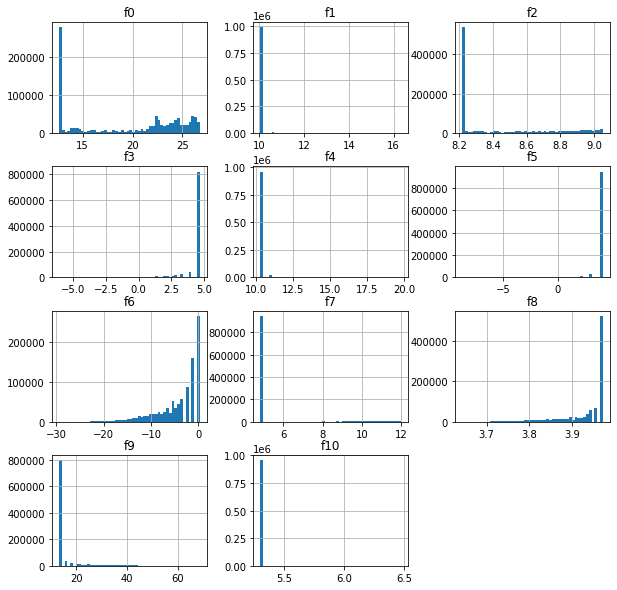

In [11]:
df[feat_cols].hist(bins=50, figsize=(10, 10));

## Target and threatment

In [15]:
pd.crosstab(df["conversion"], df["treatment"])

treatment,0,1
conversion,,
0,149763,847266
1,288,2683


# Approaches

In [25]:
df.head()

,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,treatment,conversion,visit,exposure
360096,22.662852,10.059654,8.214383,4.679882,10.280525,4.115453,-6.699321,4.833815,3.971858,13.190056,5.300375,-0.168679,1,0,0,0
8984275,12.660561,10.059654,8.481592,-2.118394,10.280525,4.115453,-13.638493,4.833815,3.755742,35.986429,5.300375,-0.168679,1,0,1,0
903162,22.327732,10.059654,8.214383,4.679882,10.280525,4.115453,-1.288207,4.833815,3.971858,13.190056,5.300375,-0.168679,1,0,0,0
4285104,24.371796,10.059654,8.296296,4.679882,10.280525,4.115453,-13.412152,4.833815,3.821584,27.760385,5.300375,-0.168679,1,0,1,0
10771332,15.030845,10.059654,8.337377,1.114982,10.280525,4.115453,-7.011752,4.833815,3.733448,57.137402,5.300375,-0.168679,1,0,1,0


In [26]:
from sklearn.model_selection import train_test_split

In [29]:
x_train, x_test, tr_train, tr_test, resp_train, resp_test = train_test_split(df[feat_cols], df["treatment"], df["conversion"])

## Solo model

In [54]:
from catboost import CatBoostClassifier
from sklift.models import SoloModel

In [56]:
sm = SoloModel(CatBoostClassifier(n_estimators=500))
sm = sm.fit(x_train, resp_train, tr_train)

Learning rate set to 0.328571
0:	learn: 0.1184336	total: 29.4ms	remaining: 14.6s
1:	learn: 0.0350466	total: 63.1ms	remaining: 15.7s
2:	learn: 0.0178602	total: 93.2ms	remaining: 15.4s
3:	learn: 0.0143793	total: 124ms	remaining: 15.4s
4:	learn: 0.0131159	total: 151ms	remaining: 14.9s
5:	learn: 0.0127156	total: 184ms	remaining: 15.1s
6:	learn: 0.0123717	total: 221ms	remaining: 15.5s
7:	learn: 0.0122783	total: 256ms	remaining: 15.7s
8:	learn: 0.0122282	total: 284ms	remaining: 15.5s
9:	learn: 0.0121407	total: 314ms	remaining: 15.4s
10:	learn: 0.0120786	total: 342ms	remaining: 15.2s
11:	learn: 0.0120256	total: 372ms	remaining: 15.1s
12:	learn: 0.0120034	total: 406ms	remaining: 15.2s
13:	learn: 0.0118909	total: 440ms	remaining: 15.3s
14:	learn: 0.0118590	total: 470ms	remaining: 15.2s
15:	learn: 0.0118529	total: 496ms	remaining: 15s
16:	learn: 0.0118087	total: 525ms	remaining: 14.9s
17:	learn: 0.0117884	total: 553ms	remaining: 14.8s
18:	learn: 0.0117613	total: 583ms	remaining: 14.8s
19:	learn:

In [58]:
uplift_sm = sm.predict(x_test)

In [65]:
from matplotlib import pyplot as plt

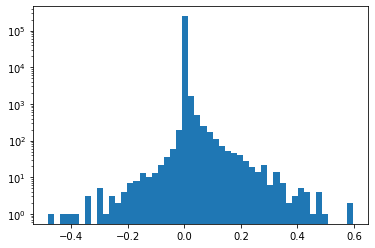

In [69]:
plt.hist(uplift_sm, bins=50, log=True);

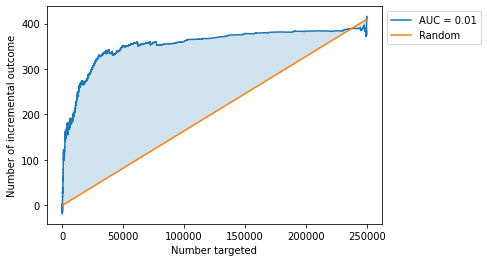

In [60]:
plot_uplift_curve(resp_test, uplift_sm, tr_test, perfect=False)

In [70]:
uplift_auc_score(resp_test, uplift_sm, tr_test)

0.0077761072704513505

## Class transformation

In [21]:
from sklift.models import ClassTransformationReg

In [23]:
from sklearn.linear_model import LogisticRegression, LinearRegression

In [87]:
tr_train.mean()

0.8498226666666666

In [88]:
ct = ClassTransformationReg(estimator=LinearRegression(), propensity_val=tr_train.mean()
                           )

In [89]:
ct = ct.fit(x_train, resp_train, tr_train)

In [91]:
uplift_ct = ct.predict(x_test)

In [92]:
from sklift.viz import plot_uplift_curve
from sklift.metrics.metrics import uplift_auc_score

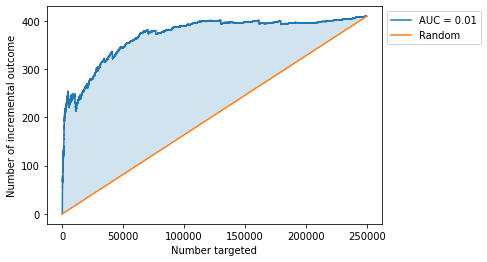

In [93]:
plot_uplift_curve(resp_test, uplift_ct, tr_test, perfect=False)

In [94]:
uplift_auc_score(resp_test, uplift_ct, tr_test)

0.008596042787377044

## T-learner

In [45]:
from sklift.models.models import TwoModels
from catboost import CatBoostClassifier

In [46]:
estimator_trmnt = CatBoostClassifier(silent=True, thread_count=2, random_state=42)
estimator_ctrl = CatBoostClassifier(silent=True, thread_count=2, random_state=42)

In [47]:
tm_ctrl = TwoModels(
    estimator_trmnt=estimator_trmnt,
    estimator_ctrl=estimator_ctrl,
    method='ddr_control'
)

In [49]:
tm_ctrl = tm_ctrl.fit(
    x_train, resp_train, tr_train
)

uplift_tm_ctrl = tm_ctrl.predict(x_test)

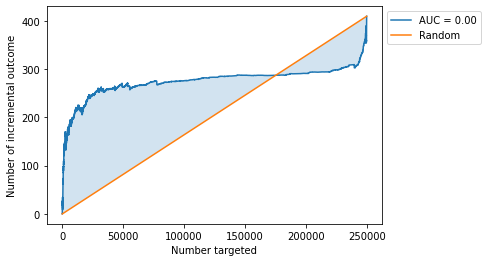

In [50]:
plot_uplift_curve(resp_test, uplift_tm_ctrl, tr_test, perfect=False)

In [51]:
uplift_auc_score(resp_test, uplift_tm_ctrl, tr_test)

0.0036553495226624017

## X-learner

# Полезные ссылки

1. Туториал по uplift моделированию: [часть 1](https://habr.com/ru/company/ru_mts/blog/485980), [часть 2](https://habr.com/ru/company/ru_mts/blog/485976/), [часть 3](https://habr.com/ru/company/ru_mts/blog/538934/).